<a href="https://colab.research.google.com/github/LailaBulh/Ingenieria_de_Datos_Avanzada/blob/main/Preprocesamiento_normalizacion_texto_LB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocesamiento y normalización de textos**
**Nombre**: Laila Montserrat Bulhosen Ramos

**Matricula**: 263166

**Link Github:** [Expresiones regulares](https://github.com/LailaBulh/Procesamiento_Lenguaje_Natural/blob/main/Preprocesamiento_normalizacion_texto_LB.ipynb)

In [1]:
!pip install emoji
!pip install pyspellchecker
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 81.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import pandas as pd
import spacy
import re
import emoji

In [4]:
### Carga de archivo CSV
tuits = pd.read_csv('/content/drive/MyDrive/Procesamiento Lenguaje Natural/tuits_cambio_climatico.csv')

print(tuits)

                                                  tuit
0    Excelente iniciativa de el uso de energías ren...
1    Inspirador que la contaminación plástica afect...
2    Datos muestran que los niveles de CO2 disminuy...
3    Indignante que las temperaturas globales sigan...
4    Inspirador que la deforestación continúe 🌊 #So...
..                                                 ...
495  Según estudios las temperaturas globales sigan...
496  Es alentador ver que se implementen políticas ...
497  Se informa que las emisiones de gases efecto i...
498  Inaceptable que la contaminación plástica afec...
499  Me alegra que las temperaturas globales sigan ...

[500 rows x 1 columns]


### **Convertir tuits a minusculas**

In [6]:
tuits['tuit'] = tuits['tuit'].str.lower()

#print(tuits)

### **Eliminar emojis**


In [7]:
### Se eliminan emojis primero como practica, para que no sean borrados al eliminar puntuaciones

tuits['sin_emojis'] = tuits['tuit'].apply(lambda x: emoji.replace_emoji(x, replace=''))
#print(tuits['sin_emojis'] )

### **Eliminar puntuaciones**


In [8]:
tuits['puntuacion'] = tuits['sin_emojis'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

#print(tuits['puntuacion'])

### **Union de tuits en un parrafo**


In [26]:
all_tuits = ''
c = 0

for row in tuits['puntuacion']:
  all_tuits+= row + ' '
  c +=1

print(all_tuits)
print(f'\n numero de tuits unidos en un parrafo: {c}')

excelente iniciativa de el uso de energías renovables se expanda  medioambiente inspirador que la contaminación plástica afecte los océanos  sostenibilidad datos muestran que los niveles de co2 disminuyan  medioambiente indignante que las temperaturas globales sigan aumentando  ecoconciencia inspirador que la deforestación continúe  sostenibilidad investigación revela que la deforestación continúe  planeta me alegra que las temperaturas globales sigan aumentando  ecoconciencia inaceptable que las temperaturas globales sigan aumentando  cambioclimático datos muestran que los niveles de co2 disminuyan  salvemoselplaneta estadísticas indican que la deforestación continúe  salvemoselplaneta estadísticas indican que la conciencia ambiental crezca  sostenibilidad datos muestran que se implementen políticas verdes  planeta estadísticas indican que el uso de energías renovables se expanda  ecoconciencia me alegra que las temperaturas globales sigan aumentando  planeta investigación revela que 

### **Remover stopwords**


In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [15]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [33]:
### Tokenizacion

tokens = word_tokenize(all_tuits, language = 'spanish')
print(f'all_tuits tokenizados: \n{tokens}')

stop_words = set(stopwords.words('spanish'))

tokens_filtrados = [word for word in tokens if word not in stop_words and word.isalpha()]

print(f'\nall_tuits sin stopwords:\n{tokens_filtrados}')

all_tuits tokenizados: 
['excelente', 'iniciativa', 'de', 'el', 'uso', 'de', 'energías', 'renovables', 'se', 'expanda', 'medioambiente', 'inspirador', 'que', 'la', 'contaminación', 'plástica', 'afecte', 'los', 'océanos', 'sostenibilidad', 'datos', 'muestran', 'que', 'los', 'niveles', 'de', 'co2', 'disminuyan', 'medioambiente', 'indignante', 'que', 'las', 'temperaturas', 'globales', 'sigan', 'aumentando', 'ecoconciencia', 'inspirador', 'que', 'la', 'deforestación', 'continúe', 'sostenibilidad', 'investigación', 'revela', 'que', 'la', 'deforestación', 'continúe', 'planeta', 'me', 'alegra', 'que', 'las', 'temperaturas', 'globales', 'sigan', 'aumentando', 'ecoconciencia', 'inaceptable', 'que', 'las', 'temperaturas', 'globales', 'sigan', 'aumentando', 'cambioclimático', 'datos', 'muestran', 'que', 'los', 'niveles', 'de', 'co2', 'disminuyan', 'salvemoselplaneta', 'estadísticas', 'indican', 'que', 'la', 'deforestación', 'continúe', 'salvemoselplaneta', 'estadísticas', 'indican', 'que', 'la', 

### **Contar frecuencia de palabras**


In [37]:
from collections import Counter

frecuencia = Counter(tokens_filtrados)
print(frecuencia)

Counter({'ecoconciencia': 93, 'salvemoselplaneta': 91, 'planeta': 84, 'cambioclimático': 82, 'medioambiente': 78, 'emisiones': 78, 'gases': 78, 'efecto': 78, 'invernadero': 78, 'reduzcan': 78, 'uso': 72, 'energías': 72, 'renovables': 72, 'expanda': 72, 'sostenibilidad': 72, 'temperaturas': 67, 'globales': 67, 'sigan': 67, 'aumentando': 67, 'contaminación': 62, 'plástica': 62, 'afecte': 62, 'océanos': 62, 'niveles': 61, 'disminuyan': 61, 'deforestación': 59, 'continúe': 59, 'conciencia': 58, 'ambiental': 58, 'crezca': 58, 'datos': 45, 'muestran': 45, 'inspirador': 44, 'implementen': 43, 'políticas': 43, 'verdes': 43, 'indignante': 39, 'alentador': 39, 'ver': 39, 'alegra': 36, 'inaceptable': 34, 'desastroso': 33, 'excelente': 32, 'iniciativa': 32, 'estadísticas': 30, 'indican': 30, 'increíblemente': 30, 'frustrante': 30, 'preocupante': 30, 'según': 30, 'estudios': 30, 'investigación': 28, 'revela': 28, 'informa': 27, 'bueno': 23})


### **Gráfica de top 20 de palabras más frecuentes**

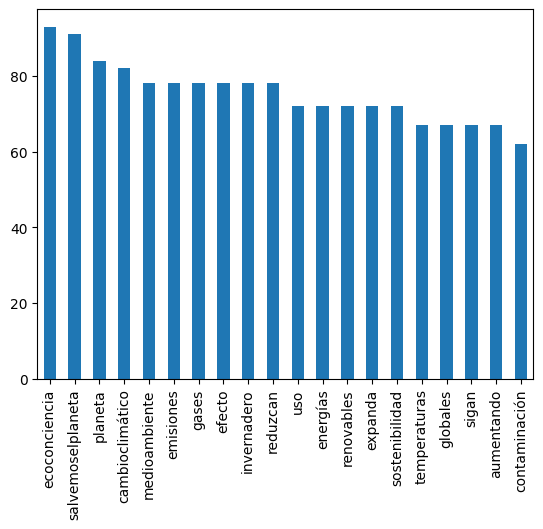

In [38]:
### Grafica de las 20 palabras más frecuentes

from matplotlib import pyplot as plt

data = dict(frecuencia.most_common(20))
data = pd.Series(data)
ax = data.plot.bar()

### **Nube de palabras**

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
from wordcloud import WordCloud

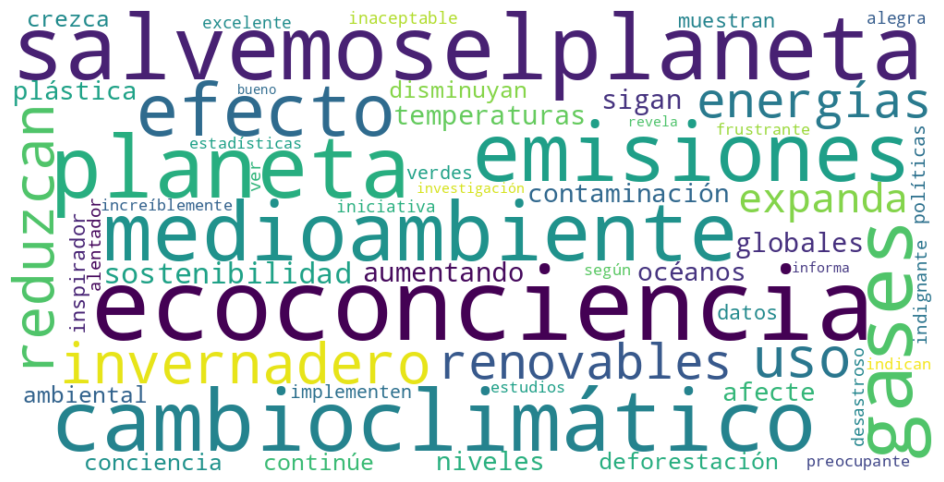

In [49]:
### Nube de palabras

plt.figure(figsize= (12,6))

wourdcloud_raw = WordCloud(width= 1000, height= 500, background_color= 'white', collocations= False).generate_from_frequencies(frecuencia)
plt.imshow(wourdcloud_raw, interpolation= 'bilinear')
plt.axis('off')
plt.show()
